## 예제 12-1-1  중심위치 알아보기

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("apartments.csv", )          ## csv 파일을 읽는다 

In [4]:
df = df.drop('Unnamed: 0', axis=1)             ## 필요없는 열을 삭제한다 

In [5]:
df.head()                                       ## 데이터를 확인한다 

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201902,1~10,162000,2,1982,개포로
1,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,74.25,201902,11~20,153500,1,1983,삼성로4길
2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,60.13,201902,11~20,130000,5,1983,개포로
3,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,60.76,201902,11~20,130500,9,1983,개포로
4,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,53.46,201902,21~28,114000,14,1983,개포로


In [6]:
df.shape                                      ## 데이터의 형상을 확인한다 

(1164, 12)

In [7]:
df.info()                                      ## 각 열의 정보와 메모리를 확인한다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 12 columns):
시군구         1164 non-null object
번지          1164 non-null object
본번          1164 non-null int64
부번          1164 non-null int64
단지명         1164 non-null object
전용면적(㎡)     1164 non-null float64
계약년월        1164 non-null int64
계약일         1164 non-null object
거래금액(만원)    1164 non-null int64
층           1164 non-null int64
건축년도        1164 non-null int64
도로명         1164 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 109.2+ KB


In [8]:
df['계약일'].count()                            ## 특정열의 개수를 확인한다 

1164

In [9]:
pd.unique(df['계약일'])                                     ## 특정 열 내의 유일한 값을 확인한다 

array(['1~10', '11~20', '21~28', '21~31'], dtype=object)

In [10]:
df['계약일'].value_counts()

11~20    463
21~28    340
1~10     258
21~31    103
Name: 계약일, dtype: int64

In [11]:
df[['계약일']].describe()                   ## 범주형 데이터의 통계를 확인하면 개수와 유일한 값들을 볼 수있다 

,계약일
count,1164
unique,4
top,11~20
freq,463


In [12]:
df[['거래금액(만원)']].describe()       ## 숫자 자료형의 열음 기술통계는 평균, 표준편차, 최소 최대값 및 4분위수까지 나온다 

,거래금액(만원)
count,1164.000000
mean,58814.713058
std,46207.115723
min,7700.000000
25%,32000.000000
50%,45850.000000
75%,69000.000000
max,630000.000000


In [13]:
df[['거래금액(만원)']].mean()               ## 평균값을 확인한다 

거래금액(만원)    58814.713058
dtype: float64

In [14]:
df[['거래금액(만원)']].median()          ## 중앙값을 확인한다 

거래금액(만원)    45850.0
dtype: float64

In [15]:
df[['거래금액(만원)']].mode()               ## 가장 만은 빈도의 값을 확인한다 

,거래금액(만원)
0,60000


In [16]:
df['거래금액(만원)'].value_counts()[60000]      ## 몇 개의 빈도가 있는 지를 확인한다 

26

In [17]:
x = df['거래금액(만원)']
bins = [.25,.5,.75]

In [18]:
m = df['거래금액(만원)'].mode()[0]

In [19]:
m

60000

In [20]:
df['거래금액(만원)'].quantile(bins)            ## 4분위에 대한 직접 계산한다 

0.25    32000.0
0.50    45850.0
0.75    69000.0
Name: 거래금액(만원), dtype: float64

In [21]:
ns, _ = np.histogram(x, bins=bins)                ##  거래금액 열에 대한 히스토그램을 구해본다 

In [22]:
ns

array([0, 0], dtype=int64)

In [23]:
m_bin = np.argmax(ns)
print("최빈값 = {}, 최빈구간 = {}~{}".format(m, bins[m_bin], bins[m_bin + 1]))

최빈값 = 60000, 최빈구간 = 0.25~0.5


In [24]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt           ## 시각화 모듈을 사용한다 
import matplotlib as mpl
import seaborn as sns

In [26]:
import sys
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False       ## 한글 처리시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

In [27]:
if sys.platform == 'darwin' : 
    font = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [28]:
if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [29]:
x = df['거래금액(만원)']
sample_mean = int(x.mean())
sample_median = x.median()
sample_mode = x.mode()[0]

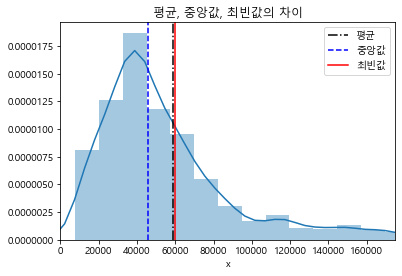

In [30]:
sns.distplot(x)                                                    ## 선그래프와 히스토그램을같이 그린다. 
plt.axvline(sample_mean, c='k', ls="-.", label="평균")             ## 이 그래프의 평균 중앙값 최빈값을 직선으로 그린다 
plt.axvline(sample_median, c='b', ls="--", label="중앙값")
plt.axvline(sample_mode, c='r', ls="-", label="최빈값")
plt.title("평균, 중앙값, 최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.xlim(0,175000)
plt.show()